<a href="https://colab.research.google.com/github/Diksha-mor21/Delhi_metro/blob/main/Delhi_Metro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
from tkinter import Tk, filedialog

In [9]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Assuming only one file is uploaded
file_name = list(uploaded.keys())[0]

try:
    df = pd.read_csv(file_name)  # Load the dataset
    print(f"File '{file_name}' loaded successfully!")
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

Saving Delhi metro.csv to Delhi metro (1).csv
File 'Delhi metro (1).csv' loaded successfully!


In [10]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()

# Convert 'Opened(Year)' to datetime format
df['Opened(Year)'] = pd.to_datetime(df['Opened(Year)'], format='%d-%m-%Y')

# Extract year from the 'Opened(Year)' column
df['Year'] = df['Opened(Year)'].dt.year

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())

Missing values in each column:
ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

Cleaned Dataset:
   ID (Station ID)                 Station Names  \
0                1  Shaheed Sthal(First Station)   
1                2                  Hindon River   
2                3                       Arthala   
3                4                   Mohan Nagar   
4                5                    Shyam park   

   Dist. From First Station(km) Metro Line Opened(Year)    Layout   Latitude  \
0                           0.0   Red line   2019-03-08  Elevated  28.670611   
1                           1.0   Red line   2019-03-08  Elevated  28.878965   
2                           2.5   Red line   2019-03-08  Elevated  28.676999   
3                           3.2  

In [11]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Number of stations per metro line
stations_per_line = df['Metro Line'].value_counts()
print("\nNumber of Stations per Metro Line:")
print(stations_per_line)

# Number of stations opened each year
stations_per_year = df['Year'].value_counts().sort_index()
print("\nNumber of Stations Opened Each Year:")
print(stations_per_year)


Summary Statistics:
       ID (Station ID)  Dist. From First Station(km)  \
count       285.000000                    285.000000   
mean         16.214035                     19.218947   
min           1.000000                      0.000000   
25%           6.000000                      7.300000   
50%          14.000000                     17.400000   
75%          24.000000                     28.800000   
max          49.000000                     52.700000   
std          11.461808                     14.002862   

                        Opened(Year)    Latitude   Longitude         Year  
count                            285  285.000000  285.000000   285.000000  
mean   2013-02-11 07:09:28.421052672   28.595428   77.029315  2012.578947  
min              2002-12-24 00:00:00   27.920862   28.698807  2002.000000  
25%              2009-11-12 00:00:00   28.545828   77.107130  2009.000000  
50%              2011-08-15 00:00:00   28.613453   77.207220  2011.000000  
75%              2

<ipython-input-12-232e2bcd3843>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Metro Line', data=df, order=df['Metro Line'].value_counts().index, palette='viridis')


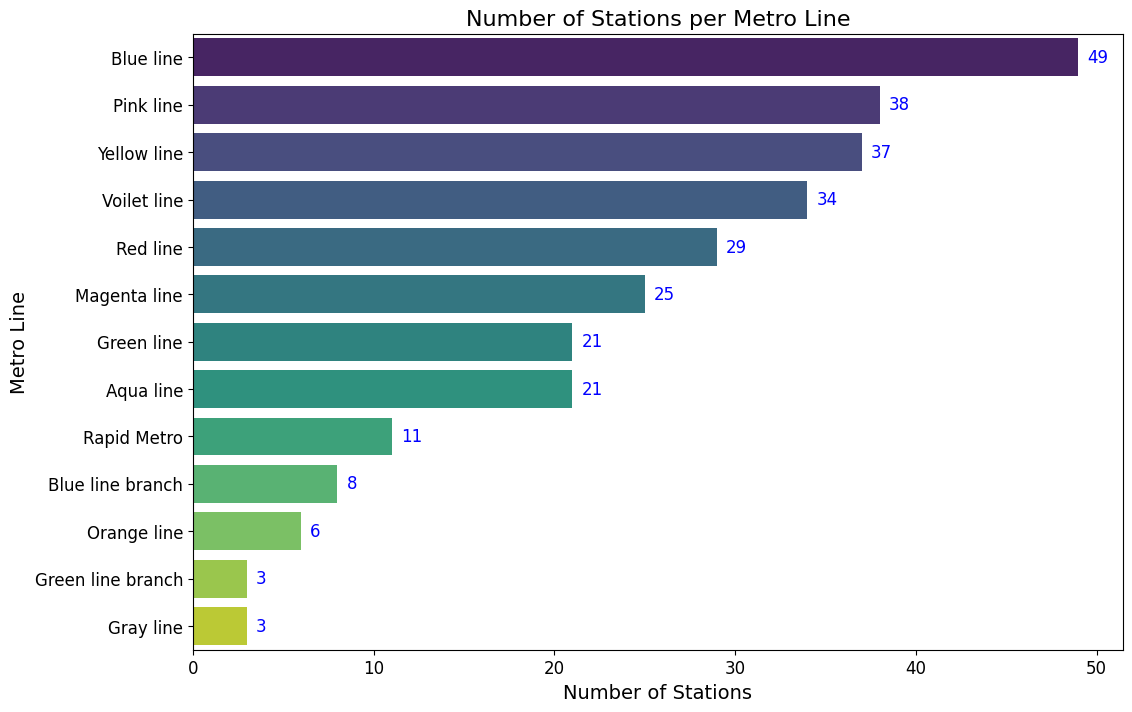

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Metro Line', data=df, order=df['Metro Line'].value_counts().index, palette='viridis')
plt.title('Number of Stations per Metro Line', fontsize=16)
plt.xlabel('Number of Stations', fontsize=14)
plt.ylabel('Metro Line', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(df['Metro Line'].value_counts().sort_values(ascending=False)):
    plt.text(v + 0.5, i, str(v), color='blue', fontsize=12, va='center')
plt.show()

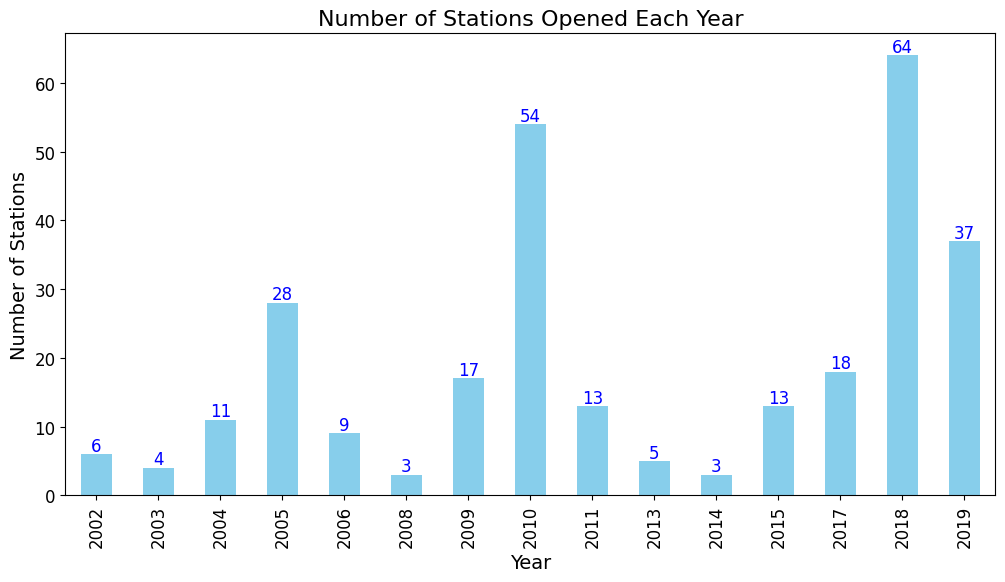

In [13]:
plt.figure(figsize=(12, 6))
stations_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Stations Opened Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(stations_per_year):
    plt.text(i, v + 0.5, str(v), color='blue', fontsize=12, ha='center')
plt.show()

In [15]:
!pip install geodatasets
import geopandas as gpd
from geodatasets import get_path

--2025-02-10 11:42:03--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 3.167.212.29, 3.167.212.66, 3.167.212.124, ...
Connecting to naciscdn.org (naciscdn.org)|3.167.212.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   360KB/s    in 0.6s    

2025-02-10 11:42:04 (360 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countries.shx  


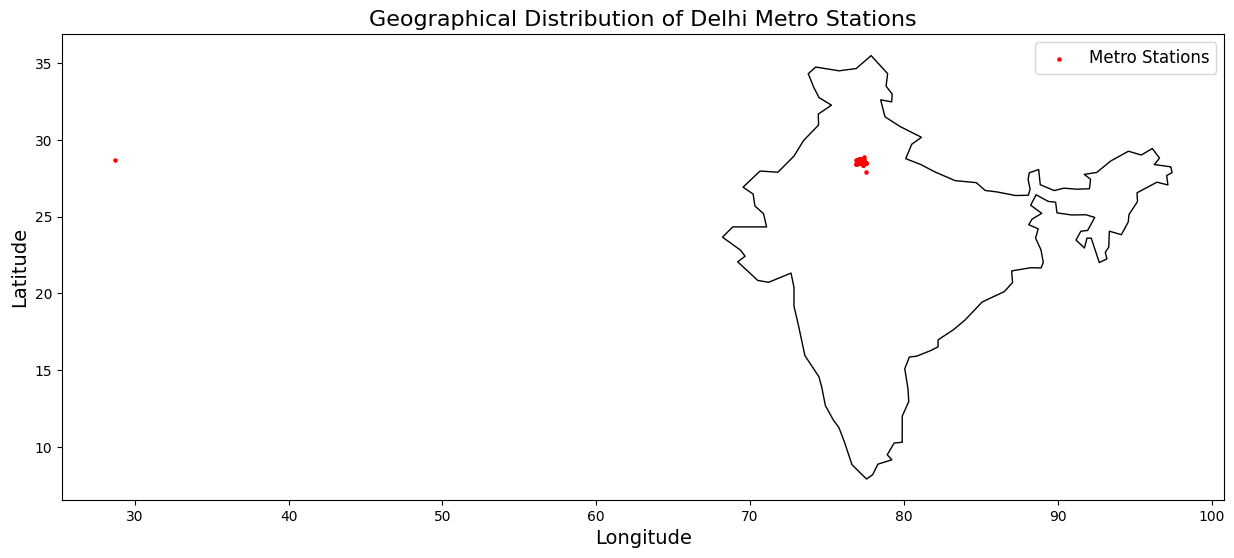

In [30]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
# Instead of using geodatasets, download the data directly
!wget https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Load the world map dataset using the downloaded path
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Create a GeoDataFrame for metro stations
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Filter the world map to show only India
ax = world[world["NAME"] == "India"].plot(color="white", edgecolor="black", figsize=(15, 10))

# Plot the metro stations on the map
gdf.plot(ax=ax, color="red", marker="o", markersize=5, label="Metro Stations")

# Add title and labels
plt.title("Geographical Distribution of Delhi Metro Stations", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [19]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='Station Names',
                     hover_data=['Metro Line', 'Year'], title='Interactive Geographical Distribution of Delhi Metro Stations')
fig.update_geos(visible=False, resolution=50, showcountries=True, countrycolor="Black")
fig.update_layout(title_font_size=20, title_x=0.5)
fig.show()


Average Distance Between Stations per Metro Line:
Metro Line
Aqua line            13.352381
Blue line            26.144898
Blue line branch      4.000000
Gray line             1.800000
Green line           11.380952
Green line branch     1.066667
Magenta line         17.656000
Orange line          10.566667
Pink line            28.773684
Rapid Metro           5.709091
Red line             16.558621
Voilet line          20.617647
Yellow line          21.462162
Name: Dist. From First Station(km), dtype: float64


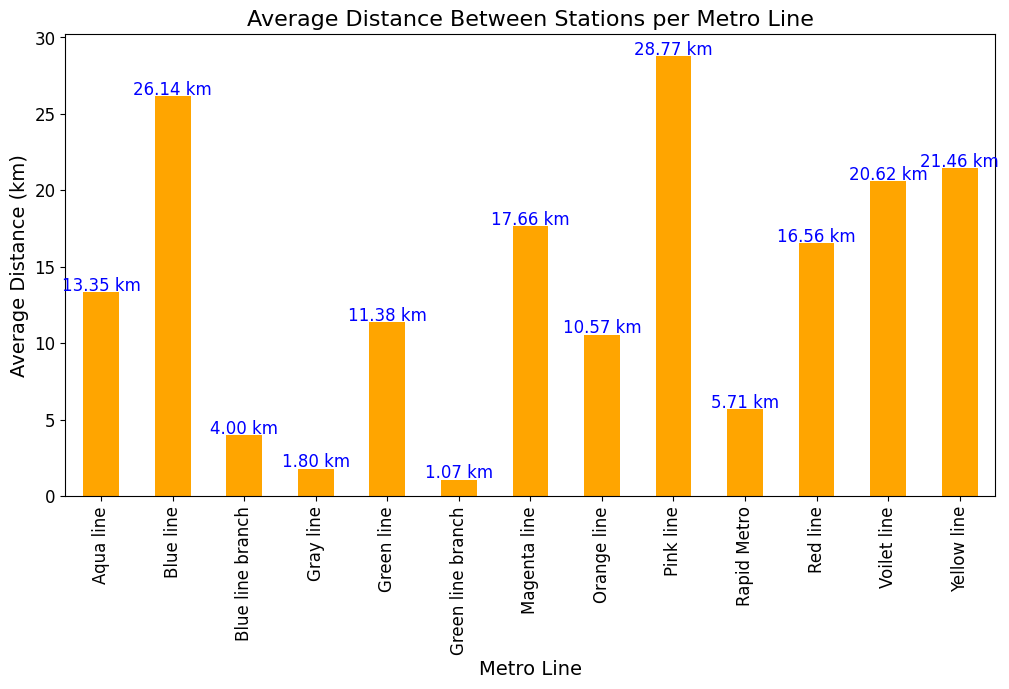

In [20]:
# Calculate the average distance between stations for each metro line
avg_distance_per_line = df.groupby('Metro Line')['Dist. From First Station(km)'].mean()
print("\nAverage Distance Between Stations per Metro Line:")
print(avg_distance_per_line)

# Plot the average distance between stations
plt.figure(figsize=(12, 6))
avg_distance_per_line.plot(kind='bar', color='orange')
plt.title('Average Distance Between Stations per Metro Line', fontsize=16)
plt.xlabel('Metro Line', fontsize=14)
plt.ylabel('Average Distance (km)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(avg_distance_per_line):
    plt.text(i, v + 0.1, f'{v:.2f} km', color='blue', fontsize=12, ha='center')
plt.show()


Correlation Between Latitude and Longitude:
           Latitude  Longitude
Latitude   1.000000  -0.074587
Longitude -0.074587   1.000000


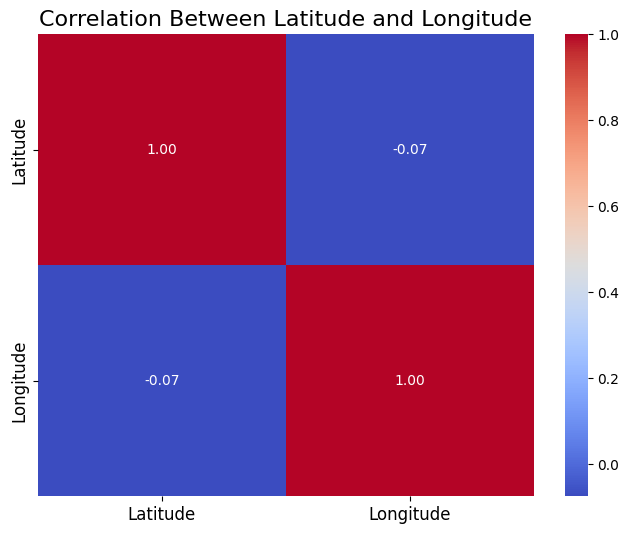

In [21]:
# Correlation matrix
corr_matrix = df[['Latitude', 'Longitude']].corr()
print("\nCorrelation Between Latitude and Longitude:")
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Latitude and Longitude', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
